In [3]:
import os
cnt_file=os.path.join('nt-10-10-5.xyz')
import numpy
cnt_coords=numpy.genfromtxt(fname=cnt_file,dtype='unicode',skip_header=2)
coords=(cnt_coords[:,1:])
coords=coords.astype(numpy.float)
for i in range(1,198):
    if (coords[i,0]==0.7087) & (coords[i,1]==6.7429) & (coords[i,2]==7.3785):
        print(i)
    if (coords[i,0]==2.0951) & (coords[i,1]==6.4482) & (coords[i,2]==7.3785):
        print(i)

137
138


In [4]:
b1=coords[138]
b2=coords[137]
print(b2)

[2.0951 6.4482 7.3785]


In [6]:
#find beta=angle between (x1,y1),(x2,y2) and horizontal. find dx and dy such that x1-dx=x2+dx
import sympy as sym

x1=b1[0]
x2=b2[0]
y1=b1[1]
y2=b2[1]
z=b1[2]
r=0.5*numpy.sqrt((x2-x1)**2+(y2-y1)**2)
dy=(y1-y2)/2
print(dy)
dx=(x1-x2+2*r)/2
print(dx)
import math 
beta=math.asin(dy/r)
print(r)
print(beta)

0.14734999999999987
0.015487704493312049
0.7086877044933121
0.20944750373662377


In [7]:
#rotate 0 to 90
theta=numpy.linspace(0,numpy.pi/2,10)
def y_eqn1(theta):
    y=(y1-dy)+r*numpy.sin(beta+theta)
    return y
def y_eqn2(theta):
    y=(y2+dy)-r*numpy.sin(beta+theta)
    return y
def x_eqn1(theta):
    x=(x1-dx)+r-r*numpy.cos(beta+theta)
    return x
def x_eqn2(theta):
    x=(x2+dx)-r+r*numpy.cos(beta+theta)
    return x

In [8]:
#new x and y values
ylist1=[]
for num in theta:
    new_y=y_eqn1(num)
    ylist1.append(new_y)
print(ylist1)   
ylist2=[]
for num in theta:
    new_y=y_eqn2(num)
    ylist2.append(new_y)
print(ylist2)
xlist1=[]
for num in theta:
    new_x=x_eqn1(num)
    xlist1.append(new_x)
print(xlist1)
xlist2=[]
for num in theta:
    new_x=x_eqn2(num)
    xlist2.append(new_x)
print(xlist2)
type(xlist1[0])

[6.742899999999999, 6.861034339165064, 6.971102071026157, 7.069758843247636, 7.15400701972829, 7.221286762257386, 7.269553809903372, 7.297341592847828, 7.303805793367284, 7.288749999999999]
[6.4482, 6.330065660834935, 6.219997928973842, 6.121341156752362, 6.037092980271709, 5.9698132377426125, 5.921546190096627, 5.893758407152171, 5.887294206632714, 5.902349999999999]
[0.7086999999999999, 0.7448183245911594, 0.8009017433902453, 0.8752461900966269, 0.9655927463172358, 1.0691962776588722, 1.1829088432476367, 1.3032753443194496, 1.4266385056476325, 1.5492499999999998]
[2.0951, 2.0589816754088406, 2.0028982566097544, 1.928553809903373, 1.838207253682764, 1.7346037223411277, 1.6208911567523632, 1.5005246556805503, 1.3771614943523673, 1.25455]


numpy.float64

In [9]:
# write bond coords to new files
line137=[]
line138=[]
for num in range (0, len(xlist1)):
    xa=str(xlist1[num])
    xb=str(xlist2[num])
    ya=str(ylist1[num])
    yb=str(ylist2[num])
    l138=F'C {xa} {ya} {z}'
    l137=F'C {xb} {yb} {z}'
    line137.append(l137)
    line138.append(l138) 

In [10]:
for num in range (0,len(line137)):
    line_137=line137[num]
    line_138=line138[num]
    with open(cnt_file,'r') as file:
        new_file_content=""
        for line in file:
            stripped_line=line.strip()
            new_line=stripped_line.replace('C  2.0951         6.4482         7.3785',line_137)
            new_file_content += new_line +"\n"
    with open('bond_rot{}.xyz'.format(num),'w+') as file:
        file.write(new_file_content)
    with open('bond_rot{}.xyz'.format(num),'r') as file:
        new_file_content2=""
        for line in file:
            stripped_line=line.strip()
            new_line_2=stripped_line.replace('C  0.7087         6.7429         7.3785',line_138)
            new_file_content2 += new_line_2 +"\n"
    with open('bond_rot{}.xyz'.format(num),'w') as file:
        file.write(new_file_content2)


In [11]:
#write xyz files to csv for visualization in matlab
import csv
for i in range(0,9):
    with open('bond_rot{}.xyz'.format(i),'r') as file:
        d=file.readlines()
    coord=[]
    for line in d:
        dline=line.split()
        coord.append(dline)
    with open('cnt{}.csv'.format(i),'w+') as file:
        csv.writer(file,delimiter=',').writerows(coord)


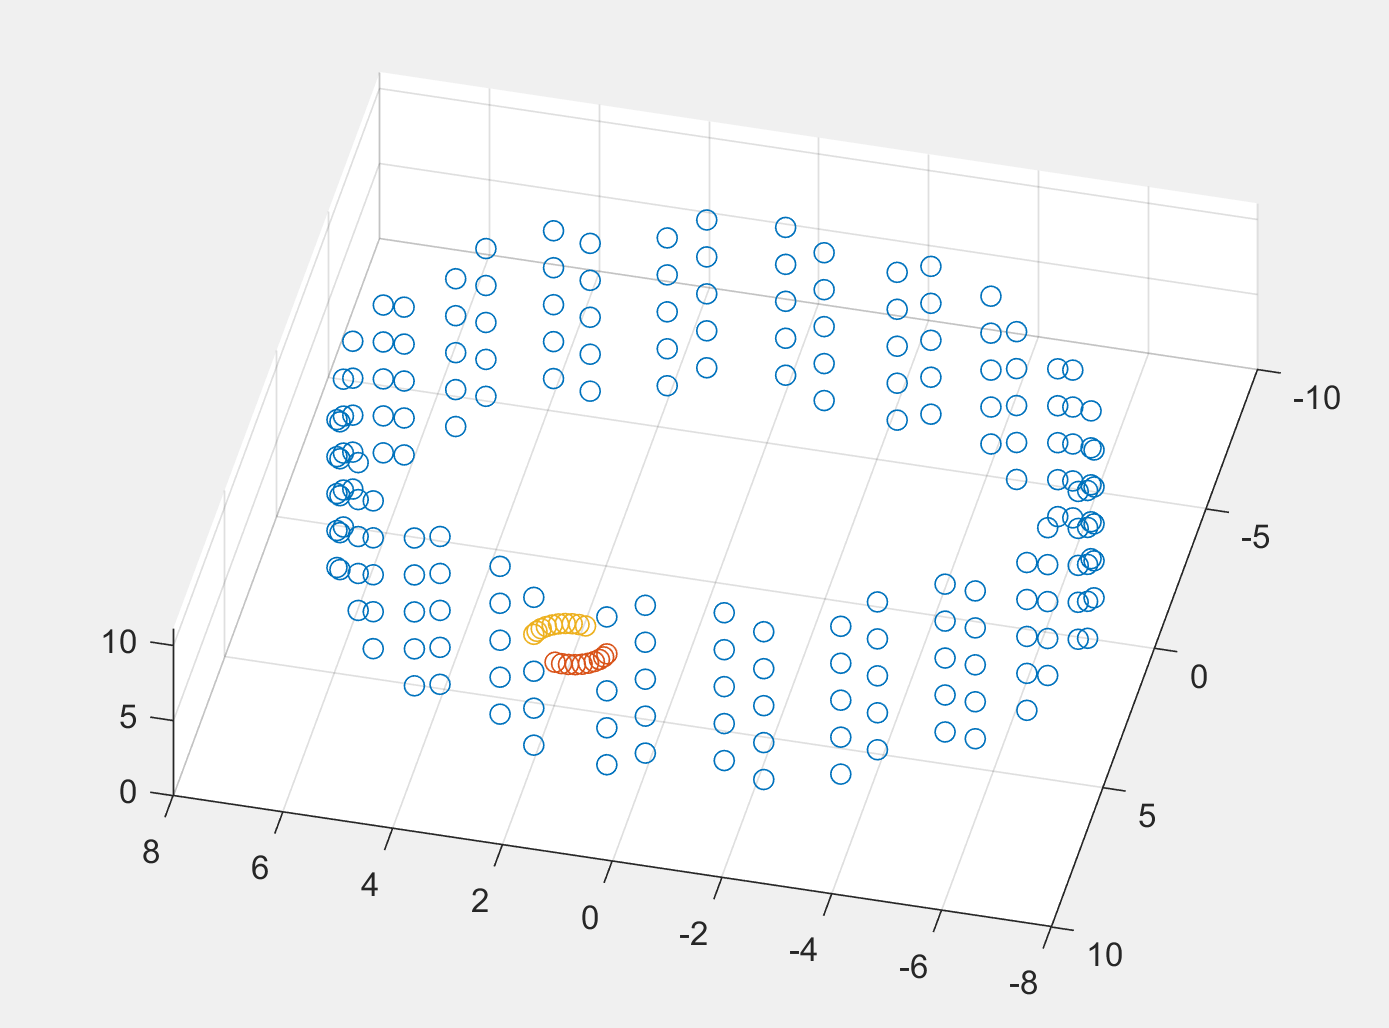

limits -2.1<x<4.6 5.45<y<6.8 4.9<z<11.07

In [12]:
#taking small section of nanotube (single iteration)
sample=[]
for i in range(0,len(coords)):
    if (-2.1<=coords[i,0]<=4.6) & (5.45<=coords[i,1]<=6.8) & (4.9<=coords[i,2]<=9.9):
        sample.append(coords[i,:])
print(sample)

[array([2.0951, 6.4482, 4.919 ]), array([0.7087, 6.7429, 4.919 ]), array([-2.0951,  6.4482,  4.919 ]), array([0.    , 6.78  , 6.1488]), array([-1.4096,  6.6318,  6.1488]), array([3.9852, 5.4851, 6.1488]), array([2.7577, 6.1938, 6.1488]), array([-2.0951,  6.4482,  7.3785]), array([2.0951, 6.4482, 7.3785]), array([0.7087, 6.7429, 7.3785]), array([3.9852, 5.4851, 8.6083]), array([2.7577, 6.1938, 8.6083]), array([0.    , 6.78  , 8.6083]), array([-1.4096,  6.6318,  8.6083]), array([2.0951, 6.4482, 9.838 ]), array([0.7087, 6.7429, 9.838 ]), array([-2.0951,  6.4482,  9.838 ])]


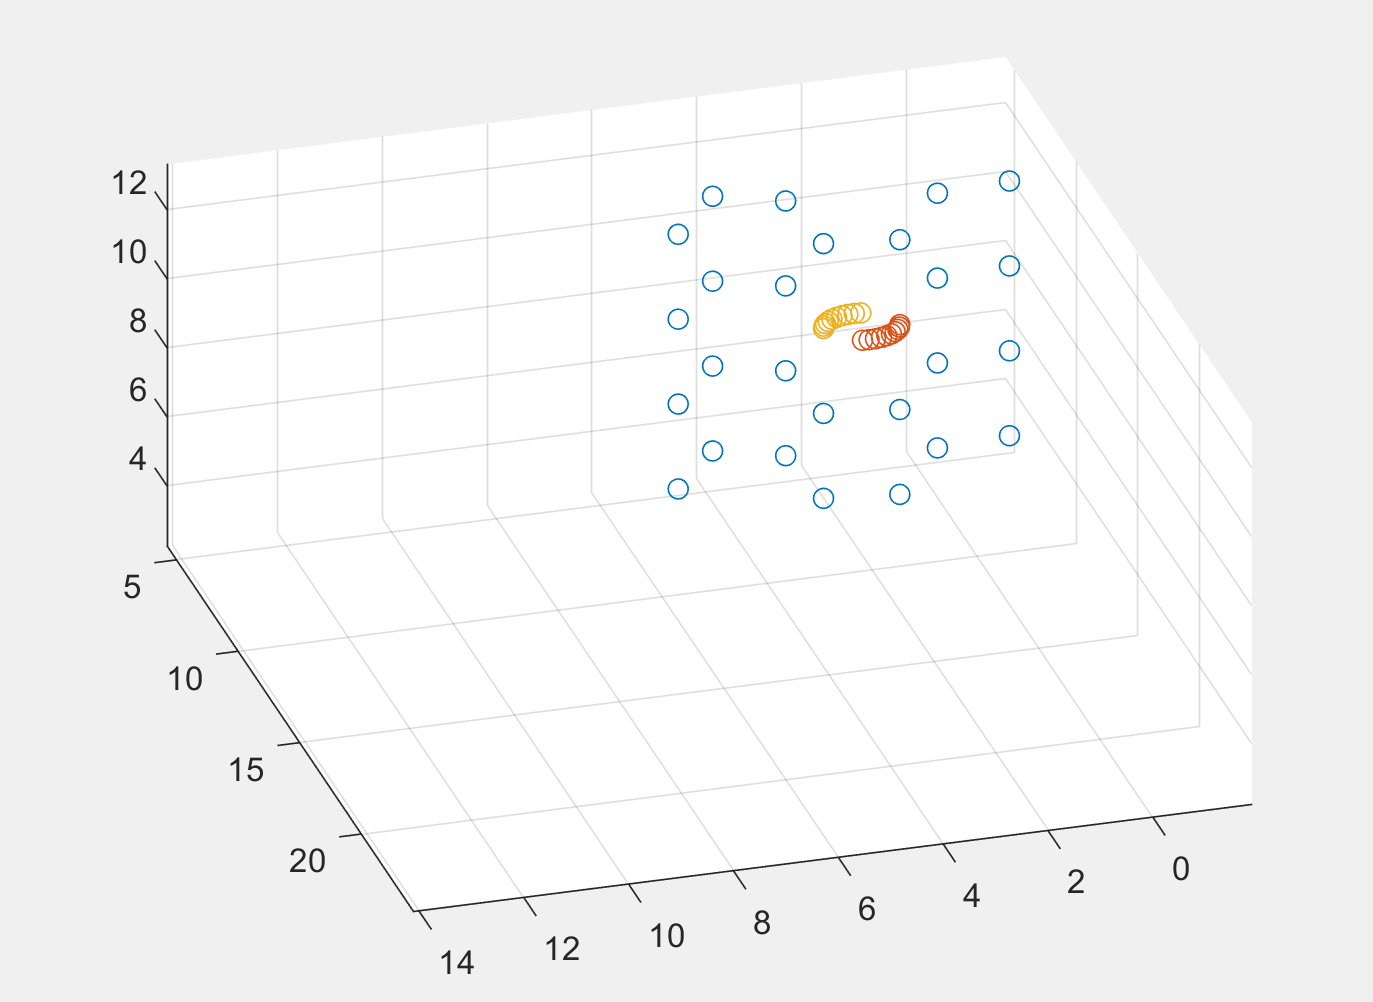

In [13]:
xyz=[]
for m in sample:
    n=m.tolist()
    xyz.append(n)
xyz_=[]
for n in xyz:
    xx=str(n).strip('[]')
    xyz_.append(xx)
    


In [14]:
s=[]
for n in xyz_:
    p=str(n).replace(',','')
    c=F'C {p}'
    print(c)
    s.append(c)
   

C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 2.0951 6.4482 7.3785
C 0.7087 6.7429 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838


In [13]:
#iterate for all rotations
sm=[]
for i in range(1,10):
    cnt=os.path.join('bond_rot{}.xyz'.format(i))
    cntxyz=numpy.genfromtxt(fname=cnt,dtype='unicode')
    xyz=cntxyz[:,1:]
    xyz=xyz.astype(numpy.float)
    for j in range(0,198):
        if (-2.1<=xyz[j,0]<=4.6) & (5.45<=xyz[j,1]<=7.5) & (4.9<=xyz[j,2]<=9.9):
            sm.append(xyz[j,:])
x=[]
for m in sm:
    n=m.tolist()
    x.append(n)
x_=[]
for n in x:
    xx=str(n).strip('[]')
    x_.append(xx)
for n in x_:
    p=str(n).replace(',','')
    c=F'C {p}'
    print(c)
    


C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 2.0589816754088406 6.330065660834935 7.3785
C 0.7448183245911594 6.861034339165064 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 2.0028982566097544 6.219997928973842 7.3785
C 0.8009017433902453 6.971102071026157 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 

In [15]:
import psi4
CNT=psi4.geometry("""
0 1
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 2.0951 6.4482 7.3785
C 0.7087 6.7429 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
""")

In [21]:

psi4.set_memory(int(5e9))

5000000000

In [18]:
cnt_energy=psi4.energy('scf/cc-pvdz',molecule=CNT)
print(cnt_energy)


-642.6519231865245


In [22]:
CNT10=psi4.geometry("""
0 1
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 2.0589816754088406 6.330065660834935 7.3785
C 0.7448183245911594 6.861034339165064 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
""")
cnt_energy10=psi4.energy('scf/cc-pvdz',molecule=CNT10)
print(cnt_energy10)

-642.6387414805538


In [19]:
CNT20=psi4.geometry("""
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 2.0028982566097544 6.219997928973842 7.3785
C 0.8009017433902453 6.971102071026157 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
""")
cnt_energy20=psi4.energy('scf/cc-pvdz',molecule=CNT20)
print(cnt_energy20)

-642.5979353727571


In [24]:
CNT30=psi4.geometry("""
0 1
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 1.928553809903373 6.121341156752362 7.3785
C 0.8752461900966269 7.069758843247636 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
""")
cnt_energy30=psi4.energy('scf/cc-pvdz',molecule=CNT30)
print(cnt_energy30)

-642.5289741243832


In [27]:
CNT40=psi4.geometry("""
0 1
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 1.838207253682764 6.037092980271709 7.3785
C 0.9655927463172358 7.15400701972829 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
""")
cnt_energy40=psi4.energy('scf/cc-pvdz',molecule=CNT40)
print(cnt_energy40)

-642.435851893202


In [33]:
CNT50=psi4.geometry("""
0 1 
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 1.7346037223411277 5.9698132377426125 7.3785
C 1.0691962776588722 7.221286762257386 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
""")
#psi4 will not calculate this one

In [29]:
CNT60=psi4.geometry("""
0 1 
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 1.6208911567523632 5.921546190096627 7.3785
C 1.1829088432476367 7.269553809903372 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
""")
cnt_energy60=psi4.energy('scf/cc-pvdz',molecule=CNT60)
print(cnt_energy60)

-642.311516477492


In [31]:
CNT70=psi4.geometry("""
0 1
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 1.5005246556805503 5.893758407152171 7.3785
C 1.3032753443194496 7.297341592847828 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
""")
cnt_energy70=psi4.energy('scf/cc-pvdz',molecule=CNT70)
print(cnt_energy70)

-642.2643193374685


In [32]:
CNT80=psi4.geometry("""
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 1.3771614943523673 5.887294206632714 7.3785
C 1.4266385056476325 7.303805793367284 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
""")
cnt_energy80=psi4.energy('scf/cc-pvdz',molecule=CNT80)
print(cnt_energy80)

-642.2216629521195


In [16]:
CNT90=psi4.geometry("""
0 1 
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 1.25455 5.902349999999999 7.3785
C 1.5492499999999998 7.288749999999999 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
""")
cnt_energy90=psi4.energy('scf/cc-pvdz',molecule=CNT90)
print(cnt_energy90)

-642.2002507966828


In [27]:
CNT100=psi4.geometry("""
0 1 
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 1.6673843391650647 7.25263167540884 7.3785
C 1.1364156608349352 5.938468324591159 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
""")
cnt_energy100=psi4.energy('scf/cc-pvdz',molecule=CNT100)
print(cnt_energy100)

-642.2101988880793


In [30]:
CNT110=psi4.geometry("""
0 1 
C 2.0951 6.4482 4.919
C 0.7087 6.7429 4.919
C -2.0951 6.4482 4.919
C 0.0 6.78 6.1488
C -1.4096 6.6318 6.1488
C 3.9852 5.4851 6.1488
C 2.7577 6.1938 6.1488
C -2.0951 6.4482 7.3785
C 1.7774520710261572 7.196548256609754 7.3785
C 1.0263479289738426 5.994551743390245 7.3785
C 3.9852 5.4851 8.6083
C 2.7577 6.1938 8.6083
C 0.0 6.78 8.6083
C -1.4096 6.6318 8.6083
C 2.0951 6.4482 9.838
C 0.7087 6.7429 9.838
C -2.0951 6.4482 9.838
""")
cnt_energy110=psi4.energy('scf/cc-pvdz',molecule=CNT110)
print(cnt_energy110)


-642.2478515516965


In [31]:
cnt_energy=-642.6519231865245
cnt_energy10=-642.6387414805538
cnt_energy20=-642.5979353727571
cnt_energy30=-642.5289741243832
cnt_energy40=-642.435851893202
cnt_energy60=-642.311516477492
cnt_energy70=-642.2643193374685
cnt_energy80=-642.2216629521195
cnt_energy90=-642.2002507966828
cnt_energy100=-642.2101988880793
cnt_energy110=-642.2478515516965

Text(0, 0.5, 'Energy (Hartrees)')

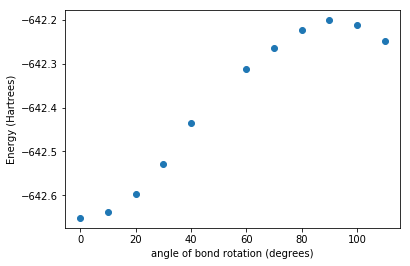

In [36]:
import matplotlib.pyplot as plt
y=[cnt_energy, cnt_energy10, cnt_energy20, cnt_energy30, cnt_energy40, cnt_energy60, cnt_energy70, cnt_energy80, cnt_energy90, cnt_energy100,cnt_energy110]
x=[0,10,20,30,40,60,70,80,90,100,110]
plt.plot(x,y,'o')
plt.xlabel('angle of bond rotation (degrees)')
plt.ylabel('Energy (Hartrees)')

In [20]:
#just extending past 90 a little 
theta=numpy.linspace(0,11*numpy.pi/18,12)
def y_eqn1(theta):
    y=(y1-dy)+r*numpy.sin(beta+theta)
    return y
def y_eqn2(theta):
    y=(y2+dy)-r*numpy.sin(beta+theta)
    return y
def x_eqn1(theta):
    x=(x1-dx)+r-r*numpy.cos(beta+theta)
    return x
def x_eqn2(theta):
    x=(x2+dx)-r+r*numpy.cos(beta+theta)
    return x
print(theta)

[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633 1.74532925 1.91986218]


In [21]:
ylist1=[]
for num in theta:
    new_y=y_eqn1(num)
    ylist1.append(new_y)
print(ylist1)   
ylist2=[]
for num in theta:
    new_y=y_eqn2(num)
    ylist2.append(new_y)
print(ylist2)
xlist1=[]
for num in theta:
    new_x=x_eqn1(num)
    xlist1.append(new_x)
print(xlist1)
xlist2=[]
for num in theta:
    new_x=x_eqn2(num)
    xlist2.append(new_x)
print(xlist2)
type(xlist1[0])
print(xlist1[2], ylist1[2])
print(xlist2[2], ylist2[2])

[6.742899999999999, 6.861034339165064, 6.971102071026157, 7.069758843247636, 7.15400701972829, 7.221286762257386, 7.269553809903372, 7.297341592847828, 7.303805793367284, 7.288749999999999, 7.25263167540884, 7.196548256609754]
[6.4482, 6.330065660834935, 6.219997928973842, 6.121341156752362, 6.037092980271709, 5.9698132377426125, 5.921546190096627, 5.893758407152171, 5.887294206632714, 5.902349999999999, 5.938468324591159, 5.994551743390245]
[0.7086999999999999, 0.7448183245911594, 0.8009017433902453, 0.8752461900966269, 0.9655927463172358, 1.0691962776588722, 1.1829088432476367, 1.3032753443194496, 1.4266385056476325, 1.5492499999999998, 1.6673843391650647, 1.7774520710261568]
[2.0951, 2.0589816754088406, 2.0028982566097544, 1.928553809903373, 1.838207253682764, 1.7346037223411277, 1.6208911567523632, 1.5005246556805503, 1.3771614943523673, 1.25455, 1.1364156608349352, 1.026347928973843]
0.8009017433902453 6.971102071026157
2.0028982566097544 6.219997928973842


In [22]:
import psi4
def rotation_energy(i):
    CNT=psi4.geometry(F"""0 1
    C 2.0951 6.4482 4.919
    C 0.7087 6.7429 4.919
    C -2.0951 6.4482 4.919
    C 0.0 6.78 6.1488
    C -1.4096 6.6318 6.1488
    C 3.9852 5.4851 6.1488
    C 2.7577 6.1938 6.1488
    C -2.0951 6.4482 7.3785
    C {xlist1[i]} {ylist1[i]} 7.3785
    C {xlist2[i]} {ylist2[i]} 7.3785
    C 3.9852 5.4851 8.6083
    C 2.7577 6.1938 8.6083
    C 0.0 6.78 8.6083
    C -1.4096 6.6318 8.6083
    C 2.0951 6.4482 9.838
    C 0.7087 6.7429 9.838
    C -2.0951 6.4482 9.838
    """)
    energy=psi4.energy('scf/cc-pvdz',molecule=CNT)
    return energy

In [25]:
energy_=[]
for i in range(0,len(xlist1)):
    if i == 5:
        continue
    energy=rotation_energy(i)
    energy_.append(energy)
    

NameError: name 'energy_' is not defined